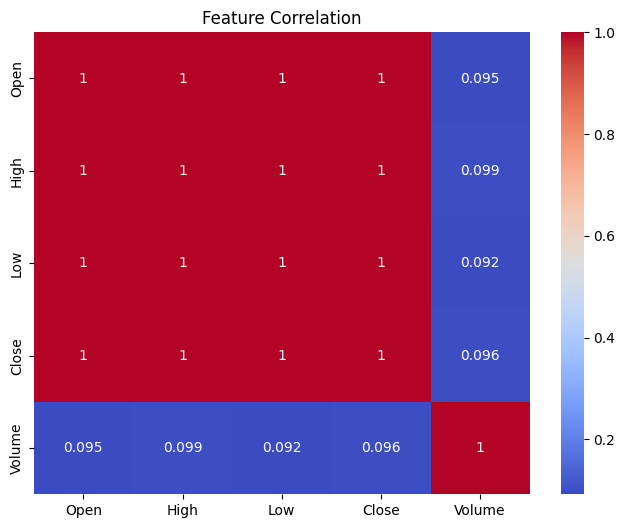

Linear Regression Mean Squared Error: 2.351321156006384
Linear Regression R² Score: 0.9997882574176362


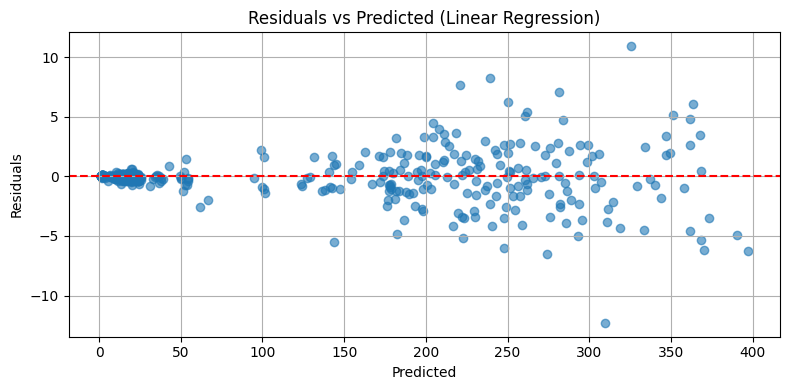

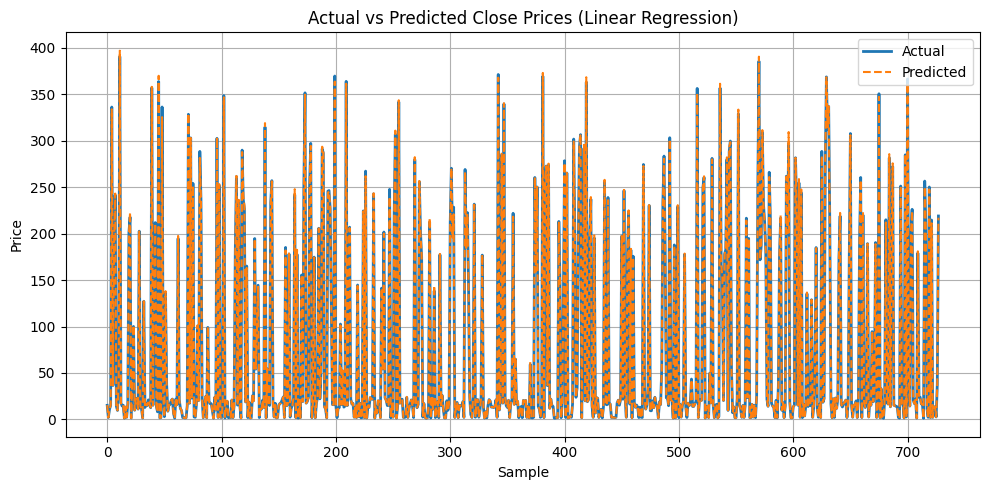

['tesla_scaler.pkl']

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load dataset
df = pd.read_csv("TESLA.csv")

# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "Date", "Adj Close"], inplace=True)

# Optional: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Define features and target
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R² Score: {r2}")

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Close Prices (Linear Regression)')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model and scaler
joblib.dump(model, "tesla_linear_model.pkl")
joblib.dump(scaler, "tesla_scaler.pkl")